# Estimation of salaries of Baseball players with non-linear Random Forests Machine learning method



In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV #
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale # for standardization
from sklearn.preprocessing import StandardScaler # for standardization
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor##  library for KNN
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

 # turn off alerts
from warnings import filterwarnings
filterwarnings ('ignore')

In [4]:
df=pd.read_csv("Hitters.csv")  
df=df.dropna() # we deleted the missing variables
dms=pd.get_dummies(df[['League','Division','NewLeague']]) # we changed categorical variables to dummys
y=df["Salary"] # bağımlı değişken
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1)# The initial states of the dependent and categorical variables were excluded.
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1) # The remaining variables and dummy variables are combined into the independent variables.
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42)# train test created.

In [5]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)# model kurulumu

In [6]:
rf_model

RandomForestRegressor(random_state=42)

In [9]:
y_pred=rf_model.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

344.8191624908484

# Model Tuning

In [31]:
#parameter set created.
rf_params={"max_depth":[2,8,10],
            "max_features": [2,5,10], # determines division
            "n_estimators":[200,500,1000,2000], # en önemli iki parametreden biri fit edilecek ağaç sayısını belirler
            "min_samples_split": [2,10,80,100]}


In [32]:
rf_cv_model=GridSearchCV(rf_model,rf_params,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [33]:
rf_cv_model.best_params_ #ideal parameters that the model gives us

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [39]:
#final model
rf_tuned=DecisionTreeRegressor(random_state=10,
                               max_depth=8,
                               max_features=2,
                               min_samples_split=2).fit(X_train,y_train)
y_pred=rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

408.67612512869306

# Variable Severity

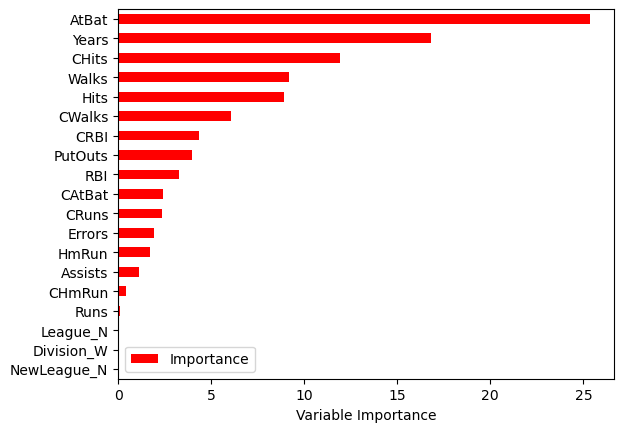

In [45]:
importance= pd.DataFrame({'Importance': rf_tuned.feature_importances_*100},
                         index=X_train.columns)


importance.sort_values(by='Importance',
                      axis=0,
                      ascending=True).plot(kind='barh',
                                          color='r')

plt.xlabel('Variable Importance')
plt.gca().legend =None

                        
                        
                        
                        
                        
                        